<a href="https://colab.research.google.com/github/neelbhavsar99/RandomForest_Test/blob/main/RandomForest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Height-Weight Dataset from my Github
url = 'https://raw.githubusercontent.com/neelbhavsar99/RandomForest_Test/main/Height_Age_Dataset.csv'
data = pd.read_csv(url)
data.head()

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [36]:
#Store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values  #Age
y = data.iloc[:, 1].values    #Height

In [37]:
#Split dataset into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [38]:
#Import Random Forest Regressor from SKLearn Ensemble Package
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor Object from the RF Regressor class
# Default settings/attributes used as from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Exception: n_estimators --> number of trees (hyperparameter)
# Exception: random_state --> Set it so same data is used for train/test for consistent results
RFReg = RandomForestRegressor(n_estimators = 10, random_state = 0)

#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [39]:
#Evaluate the RF Regression Model
y_predict_rfr = RFReg.predict((X_test))

#Model evaluation using R-Square for Random Forest Regression
#y_test = Actual Value
#y_predict_rfr = Predicted value

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is: ' ,r_square)


R-Square Error associated with Random Forest Regression is:  0.9950941925787103


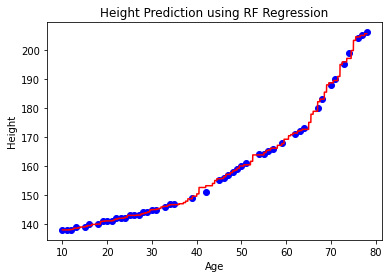

<Figure size 72x72 with 0 Axes>

In [40]:
# Visualize the RF Regression 
""" Creating the range of values from min-value of X_train to max value of X_train
having a differnce of 0.01 between two consecutive values """

X_val = np.arange(min(X_train), max(X_train), 0.01)

#Reshape the data into a len(X_val)*1 array in order to make a column out of the X_val values 
X_val = X_val.reshape((len(X_val), 1))

#Creating a scatter plot for training data
plt.scatter(X_train, y_train, color = 'blue')

#Plot for prediction data, continuous
plt.plot(X_val, RFReg.predict(X_val), color = 'red')

#Labelling properties
plt.title('Height Prediction using RF Regression')
plt.xlabel('Age')
plt.ylabel('Height')

#Sizing of plot for better visual
plt.figure(figsize=(1,1))

#Plot graph
plt.show()